<p style="font-family: Arial; font-size:2.75em;color:purple; font-style:bold">

Classification of Adult Data <br><br>
using decision tree
<br><br>
</p>

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Adult Data Analysis</p>

In this notebook, use scikit-learn  to perform a decision tree based classification of adult data.

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [855]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br></p>


In [856]:
data = pd.read_csv('./Adult/adult.data')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Adult Data Description</p>
<br>
The file **adult.data** is Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset!

In [848]:
data.dtypes

39                 int64
 State-gov        object
 77516             int64
 Bachelors        object
 13                int64
 Never-married    object
 Adm-clerical     object
 Not-in-family    object
 White            object
 Male             object
 2174              int64
 0                 int64
 40                int64
 United-States    object
 <=50K            object
dtype: object

In [849]:
data.columns

Index(['39', ' State-gov', ' 77516', ' Bachelors', ' 13', ' Never-married',
       ' Adm-clerical', ' Not-in-family', ' White', ' Male', ' 2174', ' 0',
       ' 40', ' United-States', ' <=50K'],
      dtype='object')

<br>Prediction task is to determine whether a person makes over 50K a year.  <br><br>

**Attribute Information:**

* **age:** continuous
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. fnlwgt: continuous.
* **fnlwgt:** continuous.
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num:** continuous
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black. 
* **sex:** Female, Male
* **capital-gain:** continuous
* **capital-loss:** continuous
* **hours-per-week:** continuous.
* **native-country:**  United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [935]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">Adult Data Process</p>
<br>

In [858]:
names = ("age, workclass, fnlwgt, education, education-num, "
         "marital-status, occupation, relationship, race, sex, "
         "capital-gain, capital-loss, hours-per-week, "
         "native-country, income").split(', ')    
data = pd.read_csv('./adult/adult.data',names = names)
col_names = data.columns.tolist()

In [333]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Data Cleaning<br></p>

In [416]:
data.isnull().any()

age               False
workclass         False
fnlwgt            False
education         False
education-num     False
marital-status    False
occupation        False
relationship      False
race              False
sex               False
capital-gain      False
capital-loss      False
hours-per-week    False
native-country    False
income            False
dtype: bool

In [406]:
before_rows = data.shape[0]
print(before_rows)

32561


In [407]:
data.replace(' ?', np.nan).dropna().shape

(30162, 15)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Missing value processing<br></p>

In [408]:
after_rows = data.replace(' ?', np.nan).dropna().shape[0]

In [409]:
after_rows

30162

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

How many rows dropped due to cleaning?<br></p>

In [410]:
before_rows - after_rows

2399

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Exploratory analysis <br><br></p>

In [396]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [397]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [575]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [903]:
data.groupby('native-country').size().sort_values(ascending=False)

native-country
 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                  

In [902]:
data.groupby('occupation').size().sort_values(ascending=False)

occupation
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
dtype: int64

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Draw histogram <br><br></p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000100045C0>]],
      dtype=object)

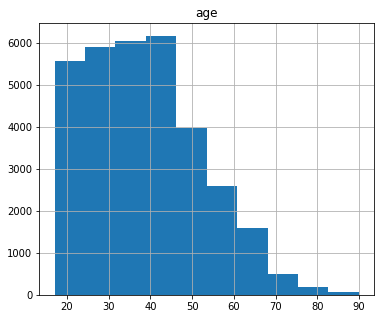

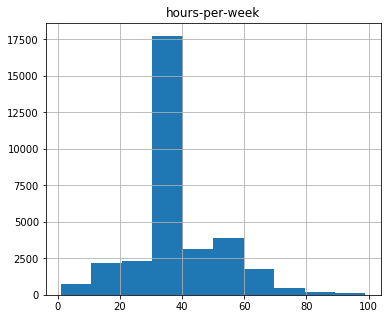

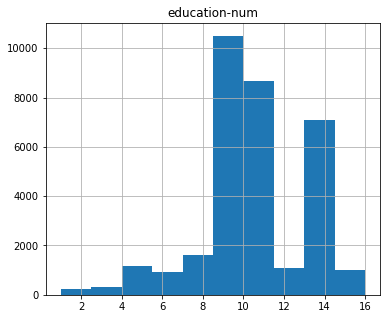

In [205]:
data.hist(column='age', figsize=(6,5))
data.hist(column='hours-per-week', figsize=(6,5))
data.hist(column='education-num', figsize=(6,5))

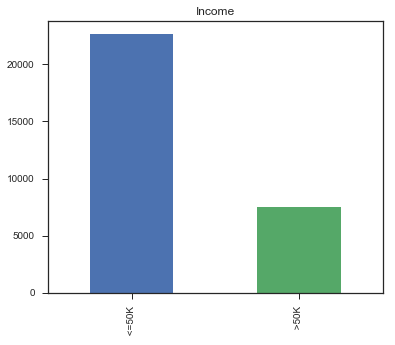

In [566]:
plt.figure(figsize =(6,5))
education_count = data['income'].value_counts().plot.bar()
plt.title('Income')
plt.show()

In [572]:
data["income"].value_counts()

 <=50K    22654
 >50K      7508
Name: income, dtype: int64

In [574]:
data["income"].value_counts() / data.shape[0]

 <=50K    0.751078
 >50K     0.248922
Name: income, dtype: float64

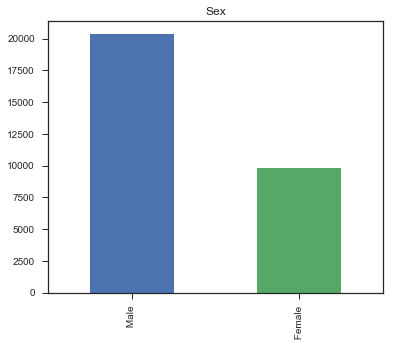

In [564]:
plt.figure(figsize =(6,5))
data['sex'].value_counts().plot.bar()
plt.title('Sex')
plt.show()

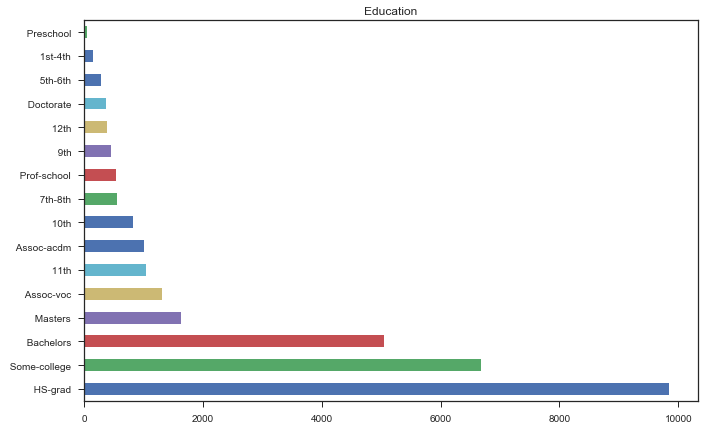

In [659]:
plt.figure(figsize =(11,7))
education_count = data['education'].value_counts()
#education_count_sort = education_count.sort_values(ascending=True)  
#education_count_sort.plot.barh()  
education_count.plot.barh()
plt.title('Education')
#plt.xlabel('Education')
plt.show()

In [581]:
data["education"].value_counts() 

 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: education, dtype: int64

In [579]:
data["education"].value_counts() / data.shape[0]

 HS-grad         0.326238
 Some-college    0.221404
 Bachelors       0.167230
 Masters         0.053942
 Assoc-voc       0.043333
 11th            0.034746
 Assoc-acdm      0.033420
 10th            0.027187
 7th-8th         0.018467
 Prof-school     0.017970
 9th             0.015085
 12th            0.012499
 Doctorate       0.012433
 5th-6th         0.009548
 1st-4th         0.005006
 Preschool       0.001492
Name: education, dtype: float64

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Draw Scatter<br><br></p>

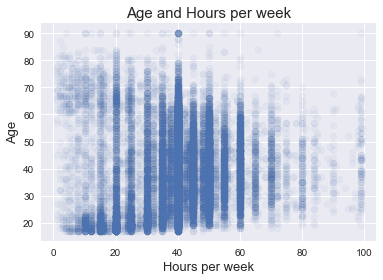

In [959]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Age and Hours per week',fontsize=15)
axis.set_xlabel('Hours per week',fontsize=13)
axis.set_ylabel('Age',fontsize=13)


Y = data['age']
X = data['hours-per-week']

axis.scatter(X, Y,alpha=0.05)

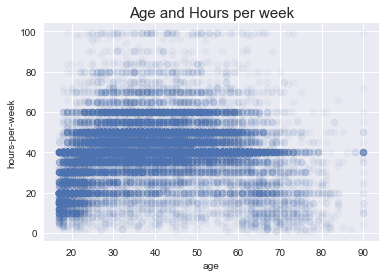

In [958]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axis = plt.subplots()
axis.yaxis.grid(True)
axis.set_title('Age and Hours per week',fontsize=15)
#axis.set_title('hours-per-week',fontsize=10)
axis.set_xlabel('age',fontsize=10)
axis.set_ylabel('hours-per-week',fontsize=10)

X = data['age']
Y = data['hours-per-week']


axis.scatter(X, Y,alpha = 0.05)
plt.show()

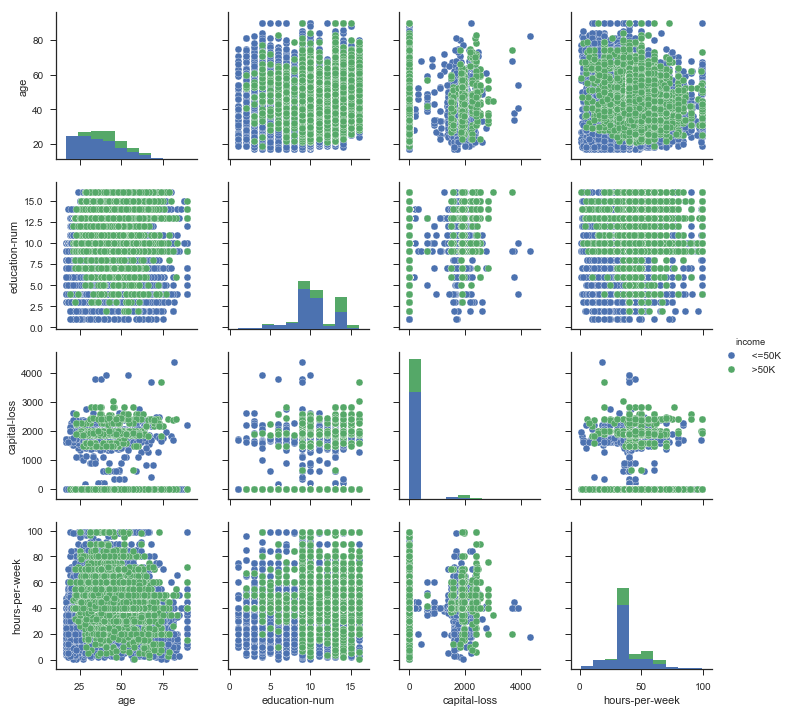

In [665]:
sns.pairplot(data.loc[:,['age','education-num','capital-loss','hours-per-week','income']],hue='income')

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Correlation<br><br></p>

In [860]:
data1=data.corr()
data1

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Seaborn<br><br></p>
https://seaborn.pydata.org/generated/seaborn.heatmap.html

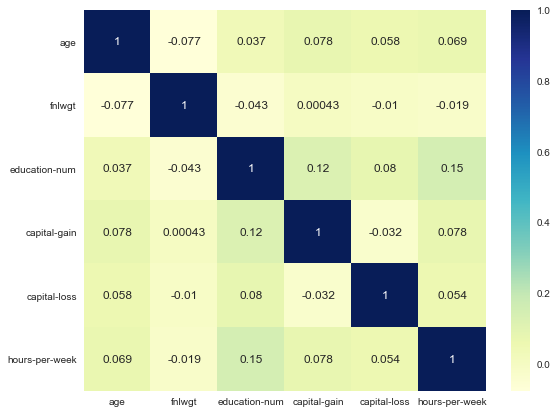

In [864]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
f,ax=plt.subplots(figsize=(9,7))
ax = sns.heatmap(data1, cmap="YlGnBu",annot=True)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Income level classification:
<br><br></p>

In [938]:
data.groupby('income')['income'].count()

income
 <=50K    24720
 >50K      7841
Name: income, dtype: int64

In [939]:
np.mean(data['income'] == ' >50K')

0.2408095574460244

In [940]:
data['income'].unique()
data = data.dropna() 
data['income'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [941]:
low_income = data[data['income'] == ' <=50K']
high_income = data[data['income'] == ' >50K']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Draw figure compare age,hours per week income level
<br><br></p>

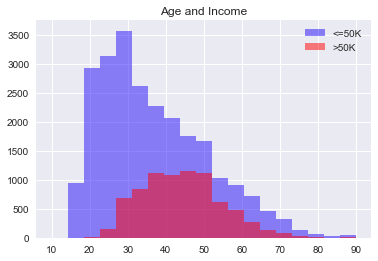

In [1018]:
plt.hist(low_income['age'].values, bins=bins, alpha=0.5, color='#230df6',label='<=50K')
plt.hist(high_income['age'].values, bins=bins, color='red',alpha=0.5, label='>50K')
plt.legend(loc='upper right');
plt.title('Age and Income')
#plt.grid(True)
plt.show()

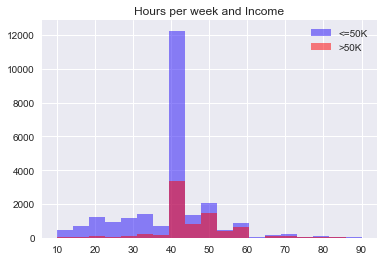

In [1015]:
plt.hist(low_income['hours-per-week'].values, bins=bins, color='#230df6',alpha=0.5, label='<=50K')
plt.hist(high_income['hours-per-week'].values, bins=bins, color='red',alpha=0.5, label='>50K')
plt.legend(loc='upper right'); 
plt.title('Hours per week and Income')
plt.grid(True)
plt.show()

(20, 70)

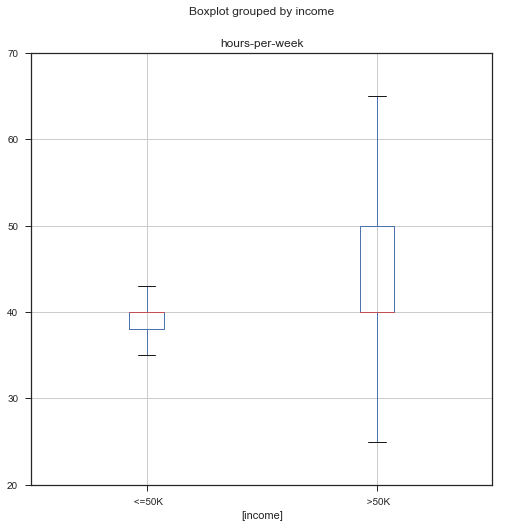

In [595]:
data_1=data.loc[:,['hours-per-week','income']]
data_1.boxplot(by='income',figsize=(8,8))
plt.ylim(20,70)

(20, 70)

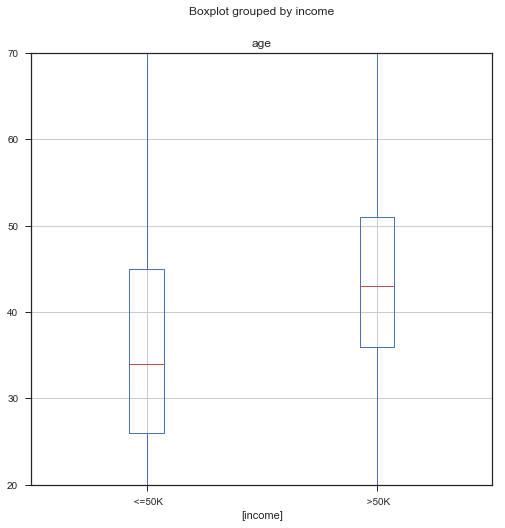

In [645]:
data_1=data.loc[:,['age','income']]
data_1.boxplot(by='income',figsize=(8,8))
plt.ylim(20,70)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Facetting histograms by subsets of data
<br><br></p>
https://seaborn.pydata.org/examples/faceted_histogram.html

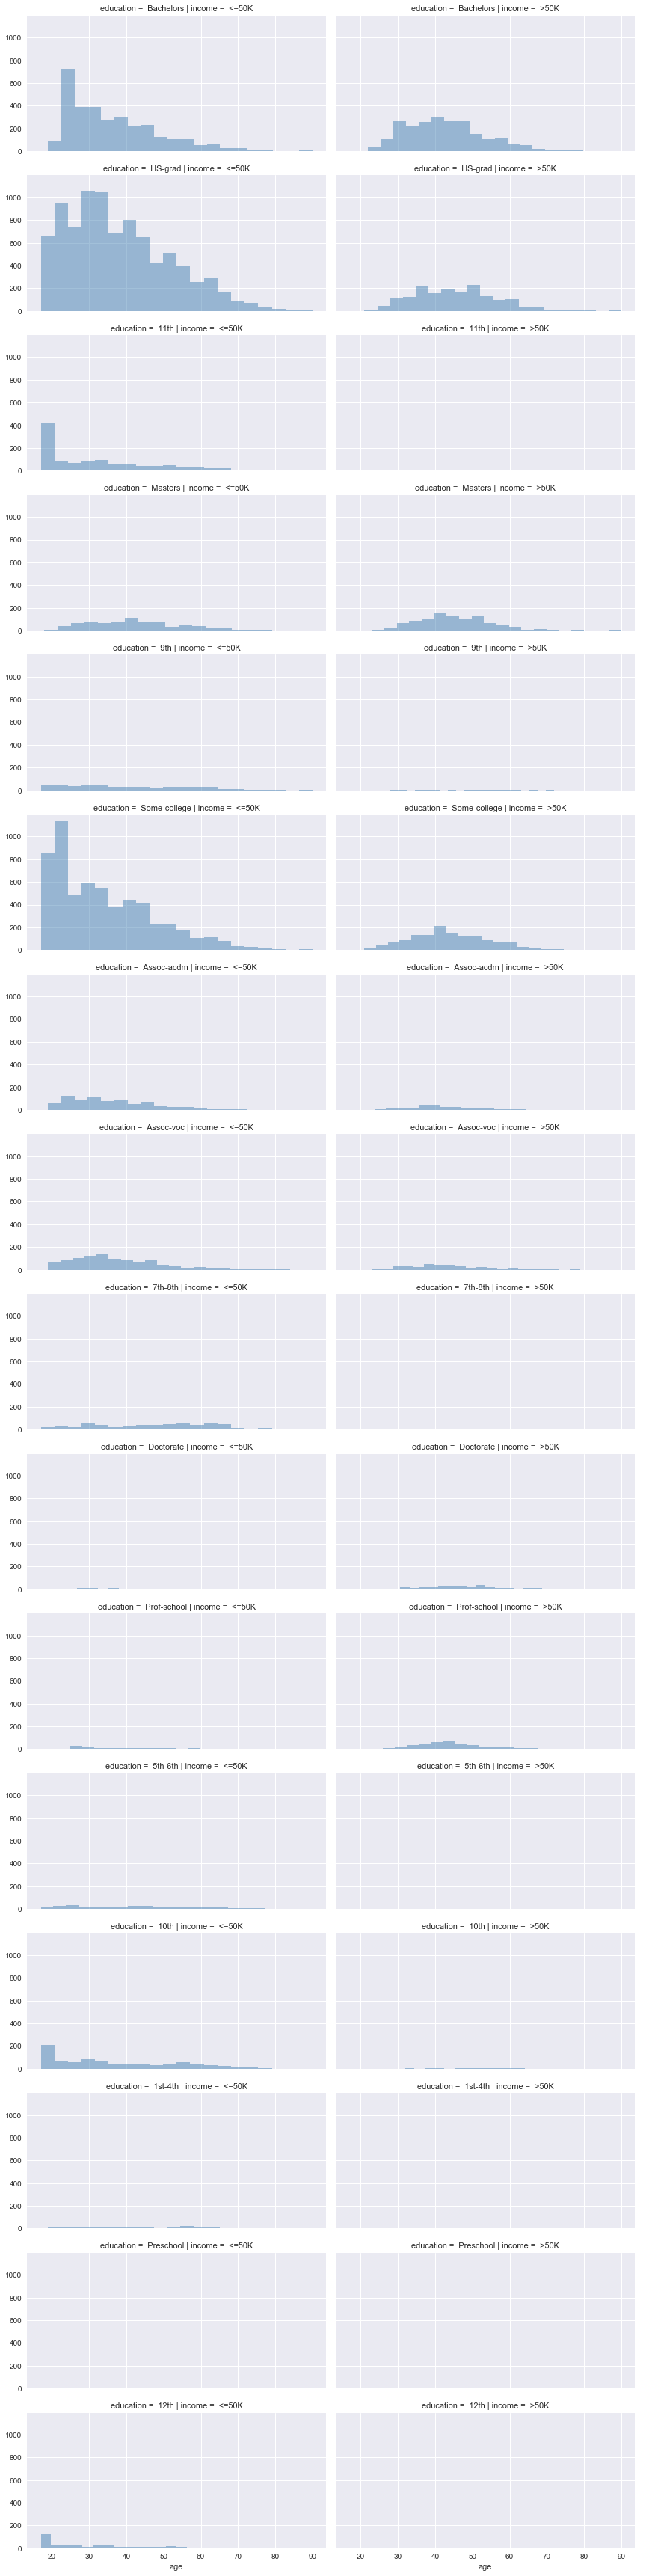

In [943]:
#import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
#sns.set(style="darkgrid")
#tips = sns.load_dataset("data")
g = sns.FacetGrid(data, row="education", col="income",size =3, aspect=2)
#bins = np.linspace(0, 60, 13)
#g.map(plt.hist, "total_bill", color="steelblue", bins=bins, lw=0)
g.map(plt.hist, "age", color="steelblue",alpha=0.5,bins=20)
g.add_legend()

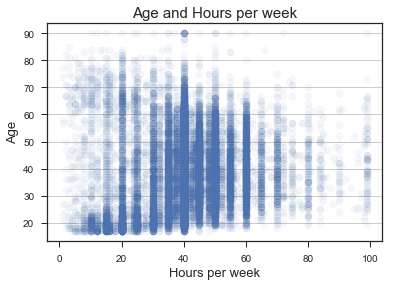

In [594]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Age and Hours per week',fontsize=15)
axis.set_xlabel('Hours per week',fontsize=13)
axis.set_ylabel('Age',fontsize=13)


Y = data['age']
X = data['hours-per-week']

axis.scatter(X, Y,alpha=0.05)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>
Education, occupation, marital status, sex and income
<br><br></p>

In [1021]:
data.education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [736]:
pd.crosstab(data['income'], data['education'],rownames=['income']).transpose()

income,<=50K,>50K
education,,
10th,761,59
11th,989,59
12th,348,29
1st-4th,145,6
5th-6th,276,12
7th-8th,522,35
9th,430,25
Assoc-acdm,752,256
Assoc-voc,963,344


Text(0.5,0.98,'education and income')

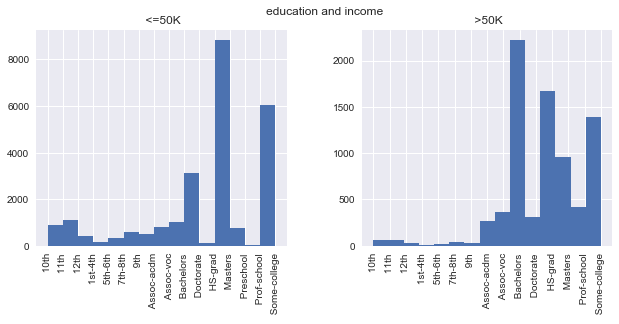

In [961]:
data.hist(column="education",by="income",bins=15,figsize=(10,4))
pl.suptitle("education and income")

Text(0.5,0.98,'occupation and income')

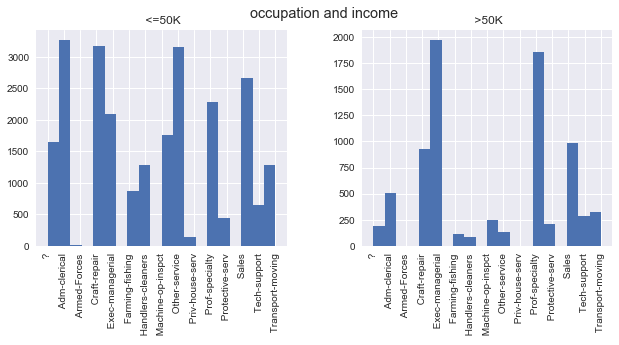

In [881]:
data.hist(column="occupation",by="income",bins=20,figsize=(10,4))
pl.suptitle("occupation and income")

Text(0.5,0.98,'marital status and income')

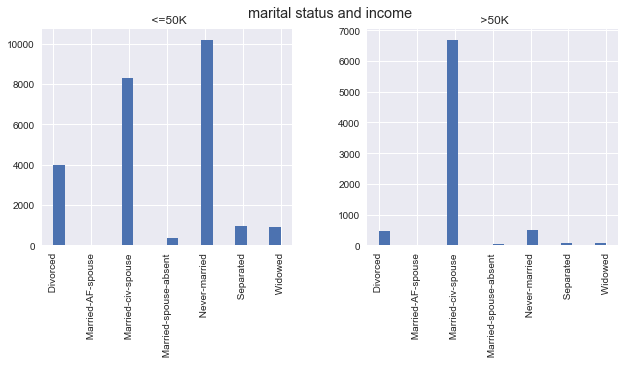

In [885]:
data.hist(column="marital-status",by="income",bins=20,figsize=(10,4))
pl.suptitle("marital status and income")

Text(0.5,0.98,'Male-Female and income')

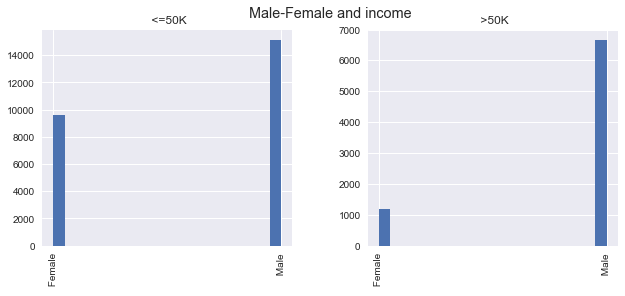

In [926]:
data.hist(column="sex",by="income",bins=20,figsize=(10,4))
pl.suptitle("Male-Female and income")

Text(0.5,0.98,'Male-Female and education')

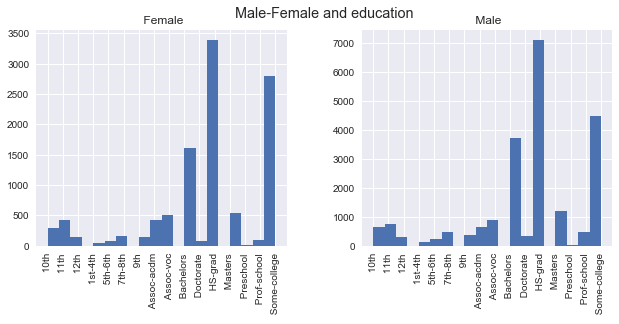

In [927]:
data.hist(column="education",by="sex",bins=20,figsize=(10,4))
pl.suptitle("Male-Female and education")

In [962]:
data["sex"].value_counts() / data.shape[0]

 Male      0.669205
 Female    0.330795
Name: sex, dtype: float64

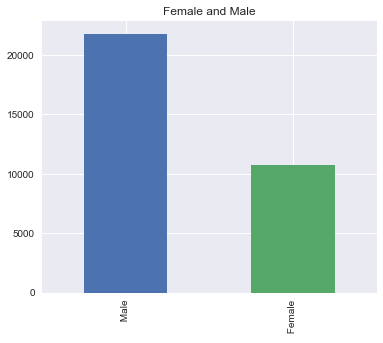

In [963]:
plt.figure(figsize =(6,5))
data['sex'].value_counts().plot.bar()
plt.title('Female and Male')
plt.show()

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold">
Convert to a Classification Task <br><br></p>

In [800]:
target = data['income']
features_data = data.drop('income', axis=1)

In [1019]:
numeric_features = [c for c in features_data if features_data[c].dtype.kind in ('i', 'f')] 
numeric_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [1020]:
numeric_data = features_data[numeric_features]
numeric_data.head(5)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


In [788]:
categorical_data = features_data.drop(numeric_features, 1)
categorical_data.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [826]:
categorical_data_encoded = categorical_data.apply(lambda x: pd.factorize(x)[0])
                                                                               
categorical_data_encoded.head(5)

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0,0,0,0,0,0,0,0
1,1,0,1,1,1,0,0,0
2,2,1,2,2,0,0,0,0
3,2,2,1,2,1,1,0,0
4,2,0,1,3,2,1,1,1


In [827]:
features = pd.concat([numeric_data, categorical_data_encoded], axis=1)
features.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,39.0,77516.0,13.0,2174.0,0.0,40.0,0,0,0,0,0,0,0,0
1,50.0,83311.0,13.0,0.0,0.0,13.0,1,0,1,1,1,0,0,0
2,38.0,215646.0,9.0,0.0,0.0,40.0,2,1,2,2,0,0,0,0
3,53.0,234721.0,7.0,0.0,0.0,40.0,2,2,1,2,1,1,0,0
4,28.0,338409.0,13.0,0.0,0.0,40.0,2,0,1,3,2,1,1,1


<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Target is stored in 'y'.
<br><br></p>

In [828]:
X = features.values.astype(np.float32) 
y = (target.values == ' >50K').astype(np.int32) 

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Perform Test and Train split

<br><br></p>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>

In [839]:
income_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
income_classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=10,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [840]:
type(income_classifier)

sklearn.tree.tree.DecisionTreeClassifier

In [841]:
predictions = income_classifier.predict(X_test)

In [842]:
predictions[:10]

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0])

In [843]:
accuracy_score(y_true = y_test, y_pred = predictions)

0.8486878838637633